In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



import sklearn

import warnings
warnings.filterwarnings(action='ignore')
from sklearn import preprocessing
from sklearn.decomposition import PCA


from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier


import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#drop TotalCharges with null
data = df[df.TotalCharges!=" "]
data.shape

(7032, 20)

In [ ]:
# change to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges)
data.TotalCharges.dtypes

dtype('float64')

In [ ]:
# list categories and their unique elements
def print_cat_unique_object(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [ ]:
# list categories and their unique elements
def print_cat_unique_int(data):
    for column in data:
        if data[column].dtypes == 'int64':
            print(f'{column} : {data[column].unique()}')

In [ ]:
# list categories and their unique elements
def print_cat_unique_float(data):
    for column in data:
        if data[column].dtypes == 'float':
            print(f'{column} : {data[column].unique()}')

In [ ]:
print_cat_unique_object(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
print_cat_unique_int(data)

SeniorCitizen : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]


In [ ]:
print_cat_unique_float(data)

MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [ ]:
data.replace('No phone service', 'No', inplace=True)
data.replace('No internet service', 'No', inplace=True)

In [ ]:
print_cat_unique_object(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
data.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Hot encoding

In [ ]:
data.InternetService

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7032, dtype: object

In [ ]:
dummy_status = pd.get_dummies(data.InternetService)
print(dummy_status)

      DSL  Fiber optic  No
0       1            0   0
1       1            0   0
2       1            0   0
3       1            0   0
4       0            1   0
...   ...          ...  ..
7038    1            0   0
7039    0            1   0
7040    1            0   0
7041    0            1   0
7042    0            1   0

[7032 rows x 3 columns]


In [ ]:
df = pd.merge(
    left=data,
    right=dummy_status,
    left_index=True,
    right_index=True,
)
print(df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0               No             DSL             No          Yes  ...   
1    

In [ ]:
data.Contract

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7032, dtype: object

In [ ]:
dummy_status = pd.get_dummies(data.Contract)
print(dummy_status)

      Month-to-month  One year  Two year
0                  1         0         0
1                  0         1         0
2                  1         0         0
3                  0         1         0
4                  1         0         0
...              ...       ...       ...
7038               0         1         0
7039               0         1         0
7040               1         0         0
7041               1         0         0
7042               0         0         1

[7032 rows x 3 columns]


In [ ]:
df = pd.merge(
    left=df,
    right=dummy_status,
    left_index=True,
    right_index=True,
)
print(df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0               No             DSL             No          Yes  ...   
1    

In [ ]:
data.PaymentMethod

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7032, dtype: object

In [ ]:
dummy_status = pd.get_dummies(data.PaymentMethod)
print(dummy_status)

      Bank transfer (automatic)  Credit card (automatic)  Electronic check  \
0                             0                        0                 1   
1                             0                        0                 0   
2                             0                        0                 0   
3                             1                        0                 0   
4                             0                        0                 1   
...                         ...                      ...               ...   
7038                          0                        0                 0   
7039                          0                        1                 0   
7040                          0                        0                 1   
7041                          0                        0                 0   
7042                          1                        0                 0   

      Mailed check  
0                0  
1                1  


In [ ]:
df = pd.merge(
    left=df,
    right=dummy_status,
    left_index=True,
    right_index=True,
)
print(df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  ... DSL  \
0               No             DSL             No          Yes  ...   1 

In [ ]:
#drop columns with more than two categories and Churn to be added at the end
df1=df.drop(['InternetService', 'Contract', 'PaymentMethod', 'Churn'], axis=1)

In [ ]:
# convert to numeric
objList = df1.select_dtypes(include = "object").columns
le = preprocessing.LabelEncoder()

df1[objList] = df1[objList].apply(le.fit_transform)
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#scale data
scale = preprocessing.MinMaxScaler()
df1 = pd.DataFrame(scale.fit_transform(df1.values), columns=df1.columns, index=df1.index)

In [ ]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# convert to numeric
objList = data.select_dtypes(include = "object").columns
le = preprocessing.LabelEncoder()

data[objList] = data[objList].apply(le.fit_transform)


In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


PCA

In [ ]:
X=df1
y = data.iloc[:, -1].values


In [ ]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print(X)

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      1.0         0.0  0.000000           0.0   
1        1.0            0.0      0.0         0.0  0.464789           1.0   
2        1.0            0.0      0.0         0.0  0.014085           1.0   
3        1.0            0.0      0.0         0.0  0.619718           0.0   
4        0.0            0.0      0.0         0.0  0.014085           1.0   
...      ...            ...      ...         ...       ...           ...   
7038     1.0            0.0      1.0         1.0  0.323944           1.0   
7039     0.0            0.0      1.0         1.0  1.000000           1.0   
7040     0.0            0.0      1.0         1.0  0.140845           0.0   
7041     1.0            1.0      1.0         0.0  0.042254           1.0   
7042     1.0            0.0      0.0         0.0  0.915493           1.0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  DSL  \
0     

Feature selection with PCA

In [ ]:
n_comp = 18
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9627
Individual variance contributions:
0.19433433524974847
0.14738590889872397
0.08616215470899811
0.054516673375769195
0.0501090848495898
0.04669493634919673
0.043563882496964274
0.04177706540857015
0.039856454576523336
0.03887045704063582
0.0352716446599118
0.032130630980526036
0.030352803506706293
0.02848553044223032
0.026715056874016076
0.024982167193925747
0.021982523359442452
0.01949589544340155


plot the first two principal components

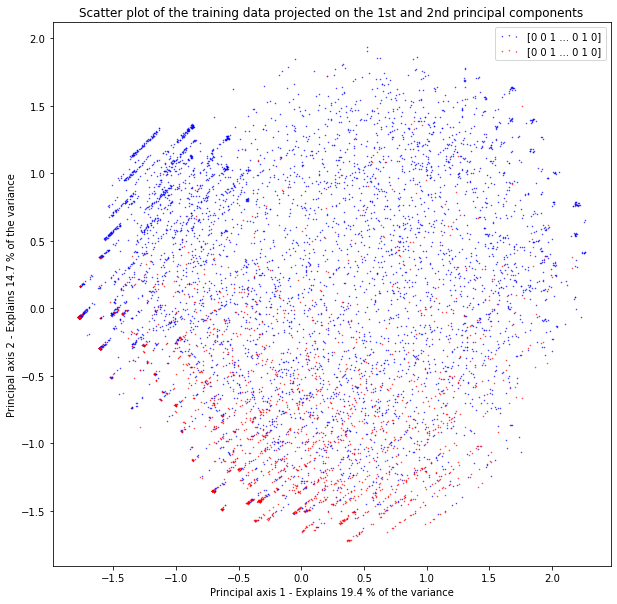

In [ ]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=y, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.19433434 0.14738591 0.08616215 0.05451667 0.05010908 0.04669494
 0.04356388 0.04177707 0.03985645 0.03887046 0.03527164 0.03213063
 0.0303528  0.02848553 0.02671506 0.02498217 0.02198252 0.0194959 ]


In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
print('number of features with variance >= 0.95 is', d)

number of features with variance >= 0.95 is 18


Choosing the number of components acheiving the required variance

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
print(X_reduced)

[[-6.22862606e-01 -3.69797068e-01  1.02892089e+00 ...  8.14402540e-02
  -3.05084075e-02 -5.45719491e-01]
 [-5.47065775e-01  8.74835808e-01  8.39514235e-01 ... -5.47657388e-01
   8.90207115e-02 -1.23447451e-02]
 [-7.62622381e-01 -4.81500876e-02  1.21425351e+00 ... -5.86016013e-01
  -1.00922592e-02 -1.33334020e-01]
 ...
 [-6.50275787e-01  1.23467081e-03  9.47439112e-01 ... -4.84565130e-01
  -5.12521250e-03  5.22590891e-02]
 [-4.58779697e-01 -9.01146486e-01 -5.70013536e-01 ...  4.69338890e-01
   7.35606946e-02  1.31868500e-01]
 [ 1.41469078e+00  3.34549496e-01 -5.49654453e-02 ... -1.46020995e-01
   2.50663102e-02  5.23236311e-02]]


Feature selection with univariate selection

In [ ]:
# feature extraction (10 features)
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
X_features = fit.transform(X)
# summarize selected features
print(X_features[0:20,:])

[5.133e-01 1.630e+02 1.618e+02 1.922e+02 1.008e+03 9.611e-01 1.128e+01
 2.124e+02 4.795e+01 3.094e+01 1.961e+02 2.824e+01 2.614e+01 2.675e+02
 2.716e+02 2.913e+02 1.100e+02 7.340e+02 3.840e+02 1.376e+03 2.306e+02
 7.032e+02 9.950e+01 1.299e+02 7.027e+02 5.841e+01]
[[0.    1.    0.115 0.001 0.    0.    1.    0.    0.    1.   ]
 [0.465 0.    0.385 0.216 0.    0.    0.    1.    0.    0.   ]
 [0.014 1.    0.354 0.01  0.    0.    1.    0.    0.    0.   ]
 [0.62  0.    0.239 0.21  0.    0.    0.    1.    0.    0.   ]
 [0.014 1.    0.522 0.015 1.    0.    1.    0.    0.    1.   ]
 [0.099 1.    0.81  0.093 1.    0.    1.    0.    0.    1.   ]
 [0.296 1.    0.705 0.223 1.    0.    1.    0.    0.    0.   ]
 [0.127 0.    0.114 0.033 0.    0.    1.    0.    0.    0.   ]
 [0.38  1.    0.861 0.349 1.    0.    1.    0.    0.    1.   ]
 [0.859 0.    0.377 0.4   0.    0.    0.    1.    0.    0.   ]
 [0.169 1.    0.315 0.066 0.    0.    1.    0.    0.    0.   ]
 [0.211 0.    0.007 0.036 0.    1.    0.  

Feature selection with features importance

In [ ]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.038 0.025 0.028 0.026 0.128 0.007 0.027 0.027 0.03  0.027 0.025 0.023
 0.023 0.032 0.128 0.152 0.011 0.043 0.009 0.037 0.021 0.051 0.012 0.011
 0.048 0.01 ]


Feature selection with correlation

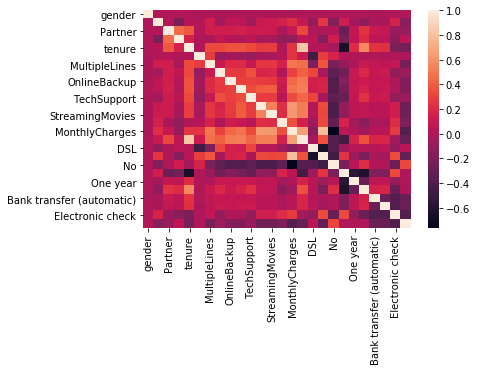

In [ ]:
corr = X.corr()
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X_corr = X[selected_columns]

In [ ]:
selected_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling',
       'DSL', 'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'],
      dtype='object')

In [ ]:
X_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,PaperlessBilling,DSL,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.323944,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7041,1.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


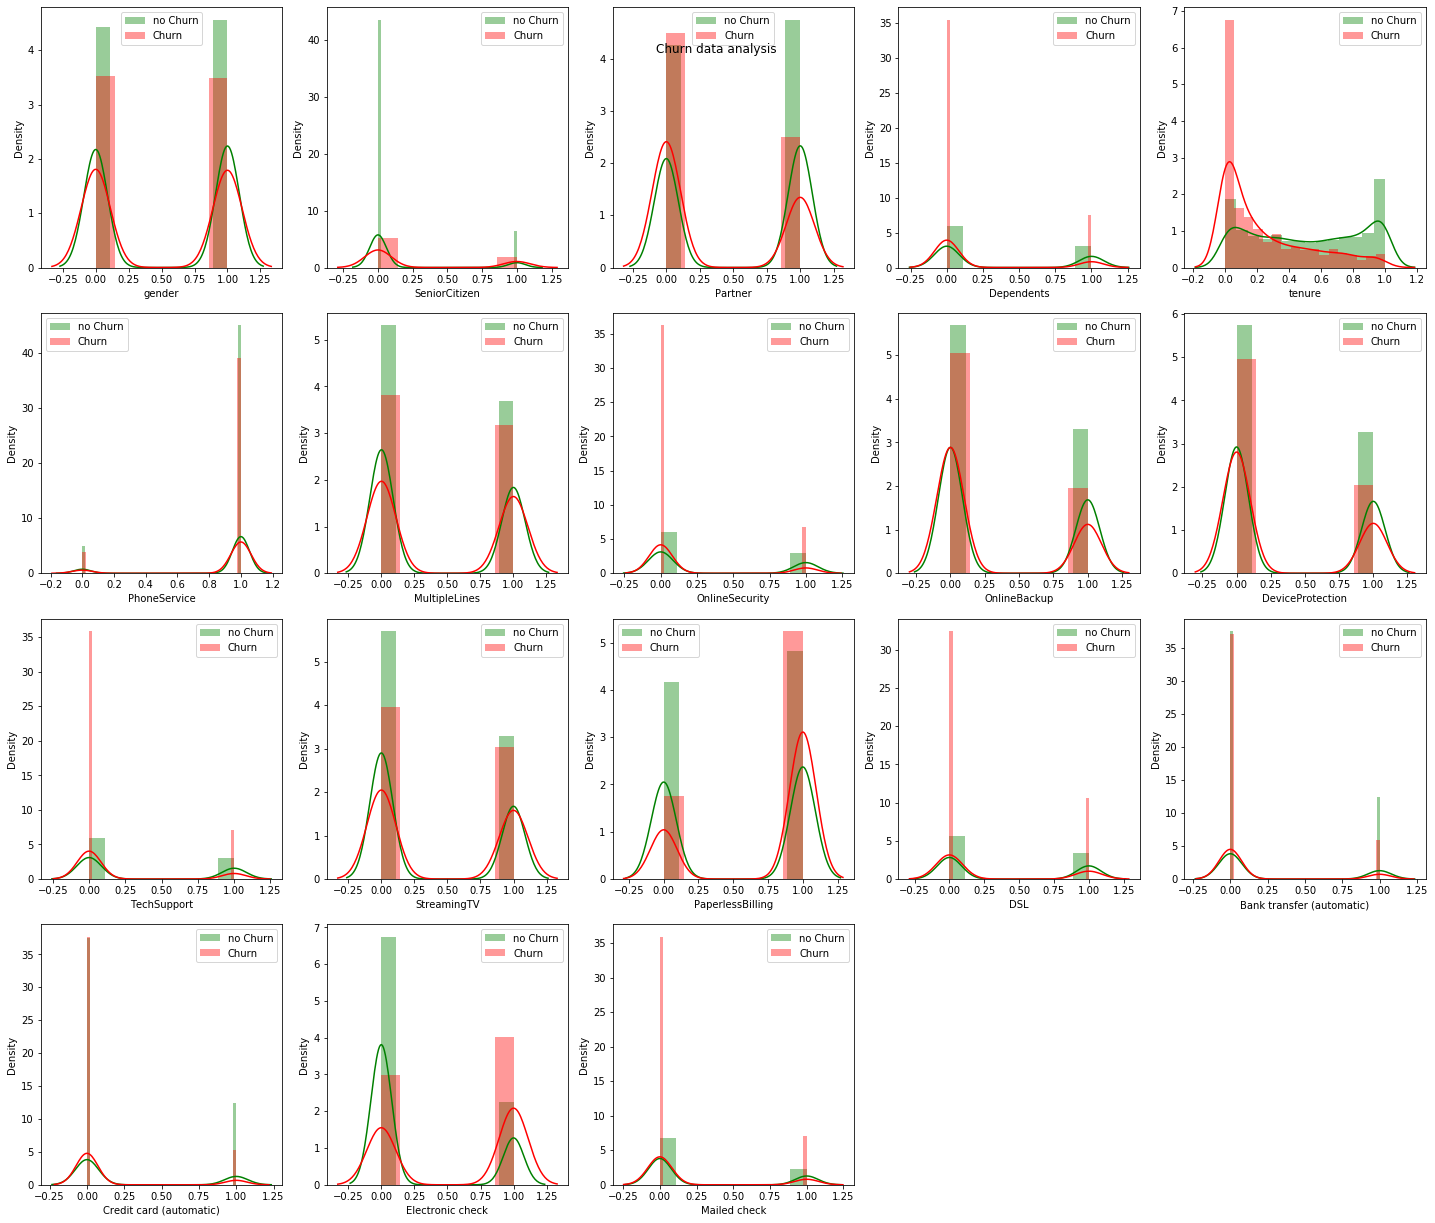

In [ ]:
fig = plt.figure(figsize = (20, 25))
fig.tight_layout()
j = 0
for i in X_corr.columns:
    plt.subplot(6, 5, j+1)
    j += 1
    sns.distplot(X_corr[i][y==0], color='g', label = 'no Churn')
    sns.distplot(X_corr[i][y==1], color='r', label = 'Churn')
    plt.legend(loc='best')
fig.suptitle('Churn data analysis')
fig.tight_layout()
fig.subplots_adjust(top=1)
plt.show()

Run With different features

In [ ]:
# Same features 26
#X=X

In [ ]:
# features reduction with PCA 18
#X=X_pca

In [ ]:
#Features reduction with univariate selection
X=X_features

In [ ]:
# features selection with Correlation 7
#X=X_corr

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
X_train

array([[0.085, 1.   , 0.811, ..., 0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.608, ..., 0.   , 0.   , 0.   ],
       [0.366, 0.   , 0.306, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.141, 1.   , 0.022, ..., 0.   , 0.   , 1.   ],
       [0.662, 1.   , 0.814, ..., 0.   , 0.   , 0.   ],
       [0.113, 1.   , 0.505, ..., 0.   , 0.   , 0.   ]])

In [ ]:
X_test

array([[0.479, 1.   , 0.019, ..., 0.   , 1.   , 0.   ],
       [0.239, 1.   , 0.574, ..., 0.   , 0.   , 0.   ],
       [0.901, 1.   , 0.845, ..., 1.   , 0.   , 0.   ],
       ...,
       [0.028, 0.   , 0.021, ..., 0.   , 0.   , 0.   ],
       [0.085, 0.   , 0.02 , ..., 1.   , 0.   , 0.   ],
       [0.634, 1.   , 0.01 , ..., 0.   , 1.   , 0.   ]])

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
print('Logistic Regression')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Logistic Regression
Accuracy: 0.7924170616113744
Precision 0.7052401746724891
Recall 0.5159744408945687
f1_score 0.5959409594095941


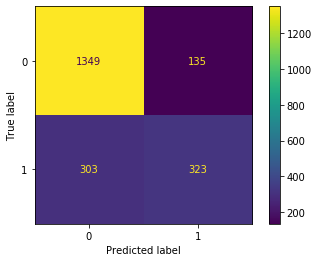

In [ ]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [ ]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=99)

In [ ]:
# Model Evaluation
y_pred_rf=rf.predict(X_test)

In [ ]:
print('Random Forrest')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Random Forrest
Accuracy: 0.7886255924170616
Precision 0.7272727272727273
Recall 0.46006389776357826
f1_score 0.5636007827788649


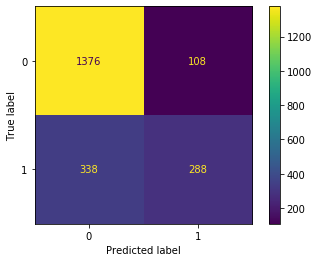

In [ ]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [ ]:
#Gaussian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(X_train,y_train)

GaussianProcessClassifier()

In [ ]:
# Model Evaluation
y_pred_gpc = gpc.predict(X_test)

In [ ]:
print('Gaussian Process Classifier')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gpc))
print("Precision",metrics.precision_score(y_test,y_pred_gpc))
print("Recall",metrics.recall_score(y_test,y_pred_gpc))
print("f1_score",metrics.f1_score(y_test,y_pred_gpc))

Random Forrest
Accuracy: 0.795734597156398
Precision 0.7241379310344828
Recall 0.5031948881789138
f1_score 0.5937794533459001


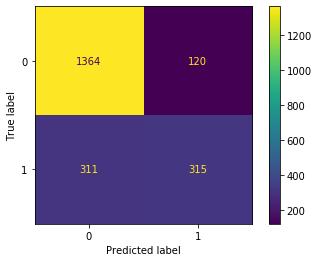

In [ ]:
metrics.plot_confusion_matrix(gpc,X_test,y_test)

In [ ]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print('SVC')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Random Forrest
Accuracy: 0.7895734597156399
Precision 0.720873786407767
Recall 0.4744408945686901
f1_score 0.5722543352601155


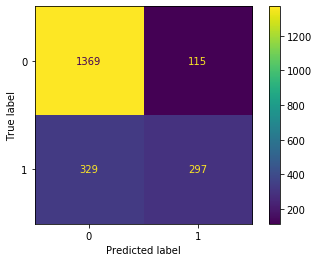

In [ ]:
metrics.plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
# Naiive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)


GaussianNB()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
print('Naiive Bayesv- GaussianNB')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Random Forrest
Accuracy: 0.7132701421800948
Precision 0.5104270109235353
Recall 0.8210862619808307
f1_score 0.6295162278015922


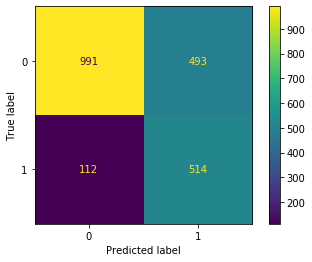

In [ ]:
metrics.plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
classifier=BernoulliNB()
classifier.fit(X_train,y_train)


BernoulliNB()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
print('Naiive Bayes - BernoulliNB')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Naiive Bayes - BernoulliNB
Accuracy: 0.7687203791469195
Precision 0.592
Recall 0.7092651757188498
f1_score 0.6453488372093023


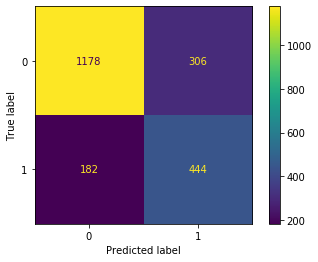

In [ ]:
metrics.plot_confusion_matrix(classifier,X_test,y_test)